In [1]:
import numpy as np
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns
#%matpoltlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
get_ipython().run_line_magic('matplotlib','inline') 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'],axis = 1)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

<Axes: >

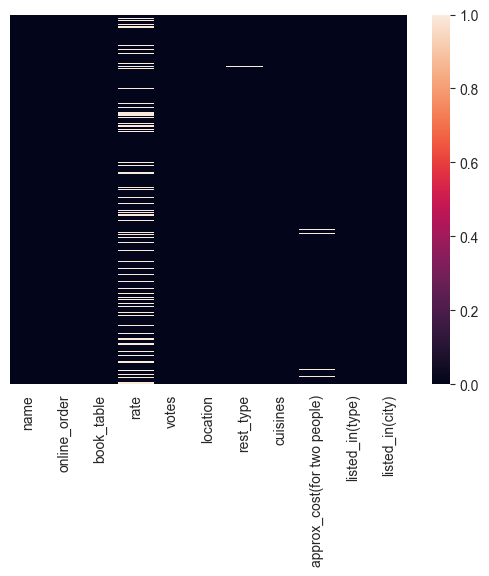

In [9]:
sns.heatmap(df.isnull(), yticklabels =False )

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def cleaning_rate(value):
    if(value == 'NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
df['rate'] = df['rate'].apply(cleaning_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
df.rate.isnull().sum()

10019

In [13]:
df['rate'].isnull().sum() #these both work

10019

In [14]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
# we filled the null places with mean of whole rate column
df.rate.isnull().sum()
#The inplace parameter is a convenient option when you want to modify the original object without creating a new one. 

0

In [15]:
df.dropna(inplace=True)
# Removed all the rows containing null values in any of the remaining columns as there are nt much of the null values , we treated maximum of them in rate column

In [16]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

<Axes: >

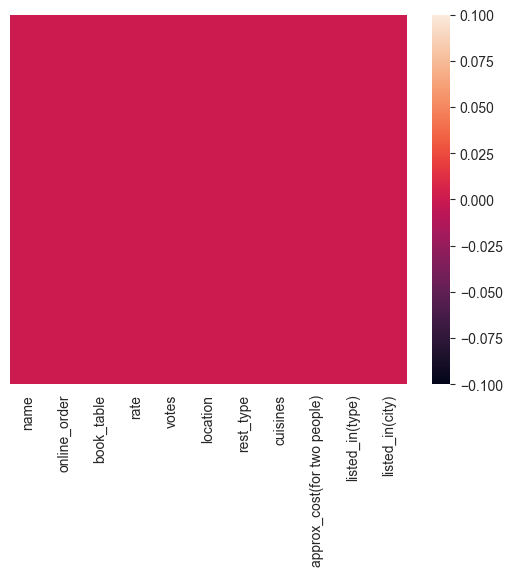

In [17]:
sns.heatmap(df.isnull(), yticklabels =False )

In [18]:
df.rename(columns={'approx_cost(for two people)':'Cost2Plates','listed_in(type)':'Type'},inplace=True)
# without inplace it will not work when you call it further

In [19]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [20]:
df['listed_in(city)'].unique()
# both listed in city and location has same vals so we gonna drop listed in city and 

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [21]:
df= df.drop(['listed_in(city)'],axis=1)

In [22]:
df['Cost2Plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [23]:
def cost_handler(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['Cost2Plates'] = df['Cost2Plates'].apply(cost_handler)
df['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [24]:
df.rest_type.value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [25]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types  

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [26]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [27]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'Others'
    else :
        return value
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [28]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [29]:
location = df['location'].value_counts(ascending = False)
location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'Others'
    else:
        return value
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [30]:
cuisines = df['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'Others'
    else:
        return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

VISUALIZATION OF DATA

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\1101900815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,x='location',palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'L

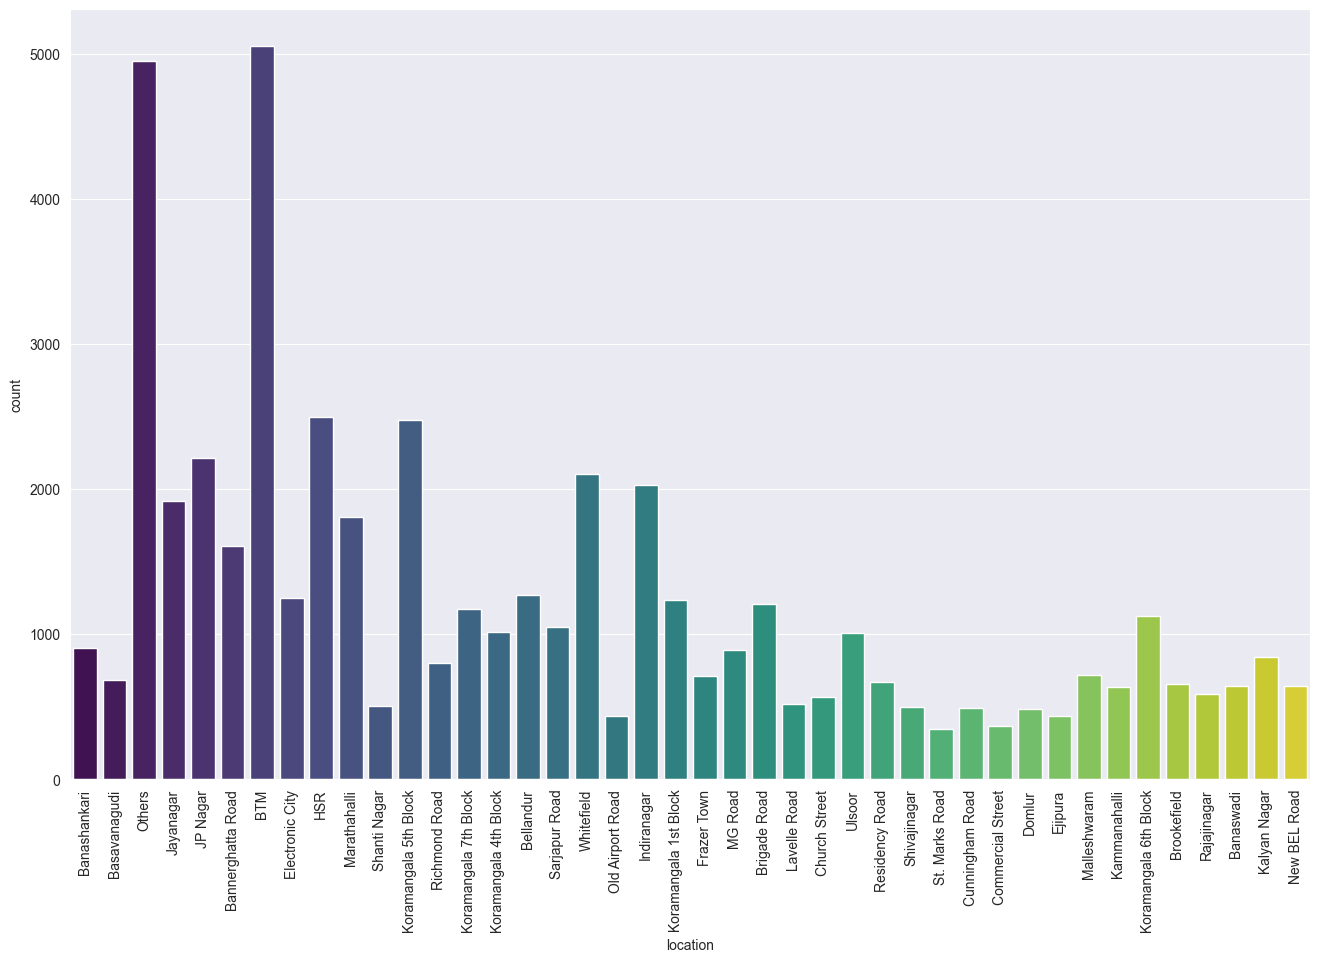

In [31]:
plt.figure(figsize=(16,10))
ax = sns.countplot(data=df,x='location',palette='viridis')
plt.xticks(rotation = 90) 

What we conclude from countplot is that we should notopen resturant where the count of resturant is already high

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\647817568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='online_order',palette='inferno')


<Axes: xlabel='online_order', ylabel='count'>

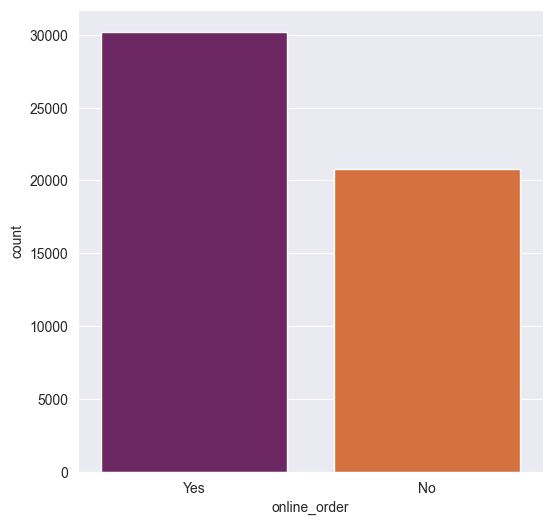

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(data= df, x='online_order',palette='inferno')

<Axes: xlabel='online_order', ylabel='rate'>

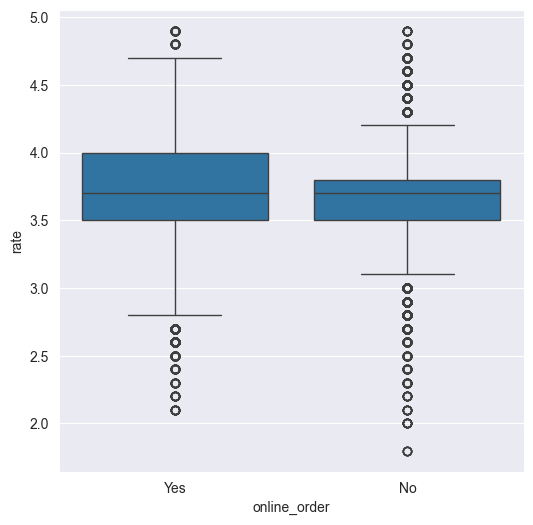

In [33]:
plt.figure(figsize=(6, 6))
sns.boxplot(data = df ,x = 'online_order',y='rate')
#REVISE BOXPLOT

In [34]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_onlineOrder.csv')
df1 = pd.read_csv('location_onlineOrder.csv')
df1 = pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1 

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\4140048325.py:4: FutureWarning: The provided callable <function sum at 0x0000025BE6592340> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Others                 2064  2890
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119

<Axes: xlabel='location'>

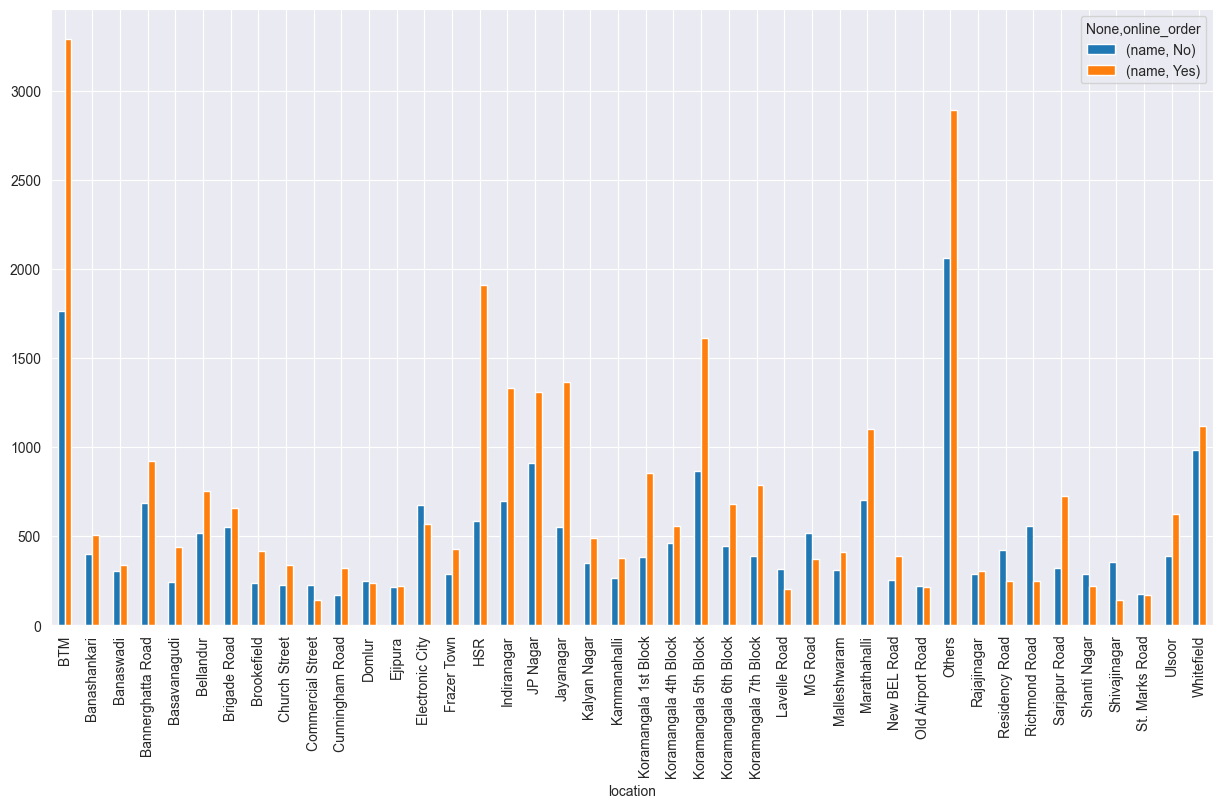

In [35]:
df1.plot(kind = 'bar' , figsize = (15,8))

In [36]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_bookTable.csv')
df2 = pd.read_csv('location_bookTable.csv')
df2 = pd.pivot_table(df2 , values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\3308923386.py:4: FutureWarning: The provided callable <function sum at 0x0000025BE6592340> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2 , values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Others                 4587  367
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253

<Axes: xlabel='location'>

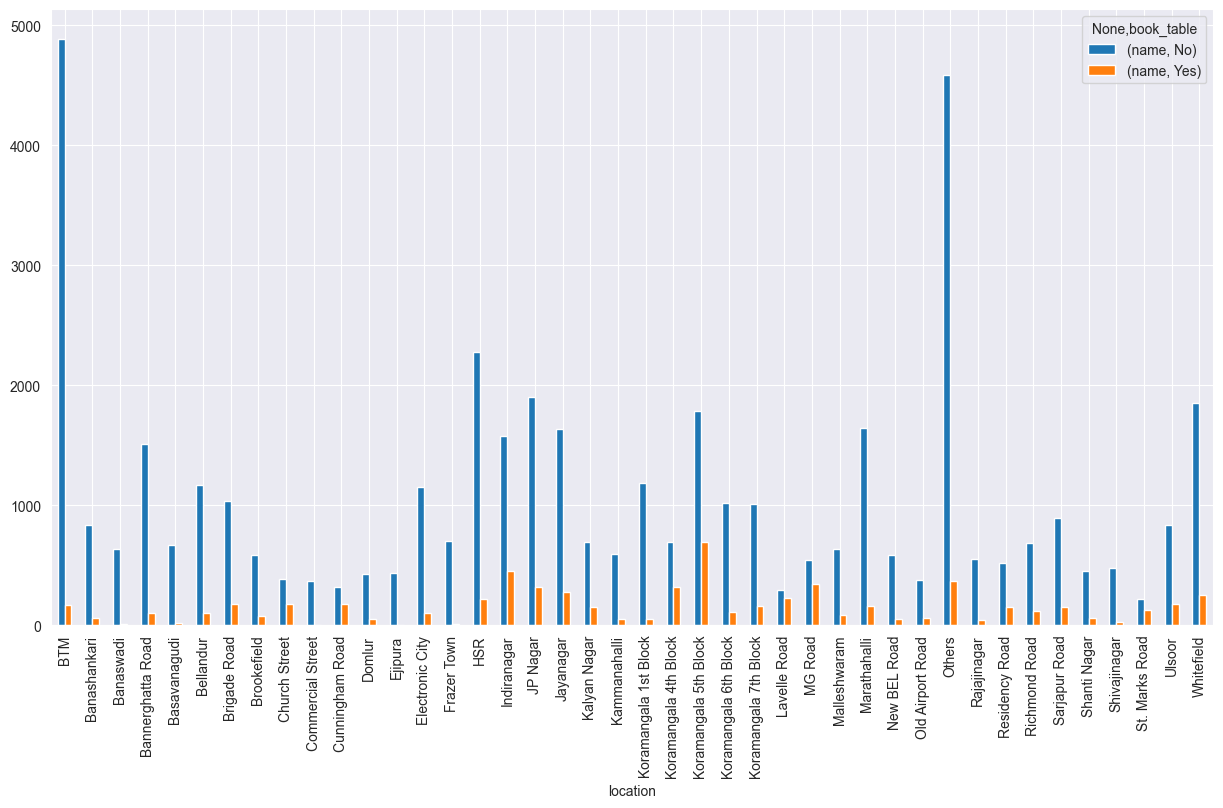

In [37]:
df2.plot(kind = 'bar',figsize= (15,8) )

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\2801368087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Type' , y = 'rate' , data= df, palette='inferno')


<Axes: xlabel='Type', ylabel='rate'>

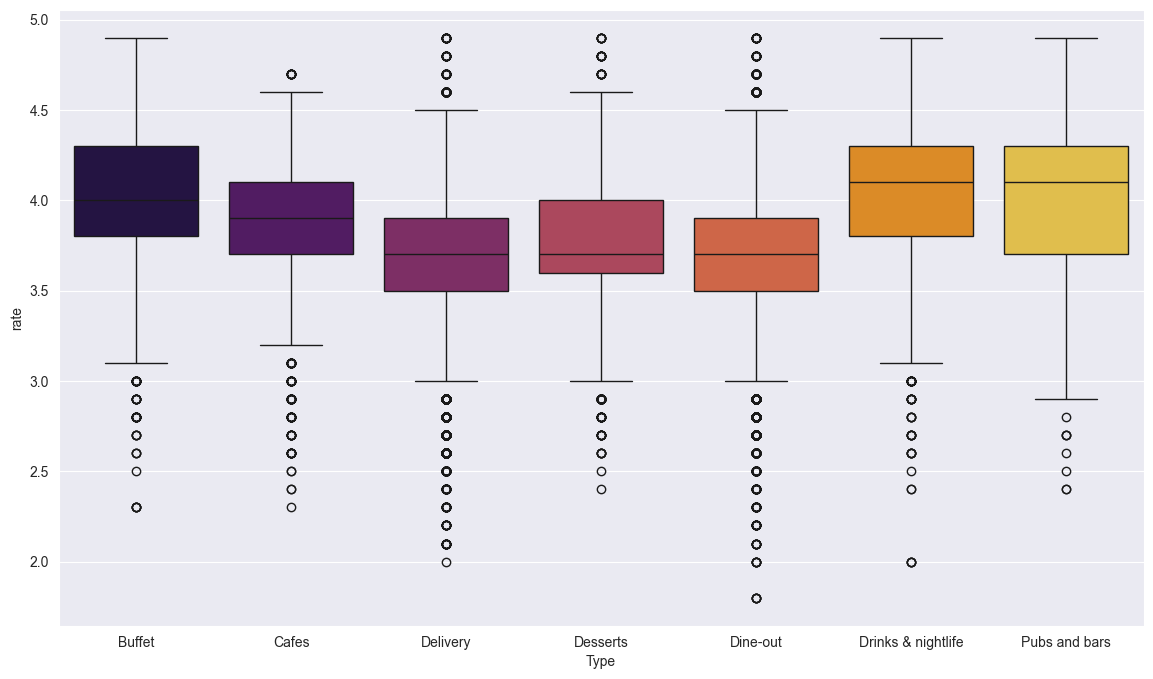

In [38]:
plt.figure(figsize=(14,8))
sns.boxplot(x = 'Type' , y = 'rate' , data= df, palette='inferno')

In [39]:
#REVISE BOXPLOT
df3 = df.groupby(['location', 'Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3 , values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\2046983768.py:5: FutureWarning: The provided callable <function sum at 0x0000025BE6592340> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3 , values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)


name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Others                    83   133     2787      276     1553   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

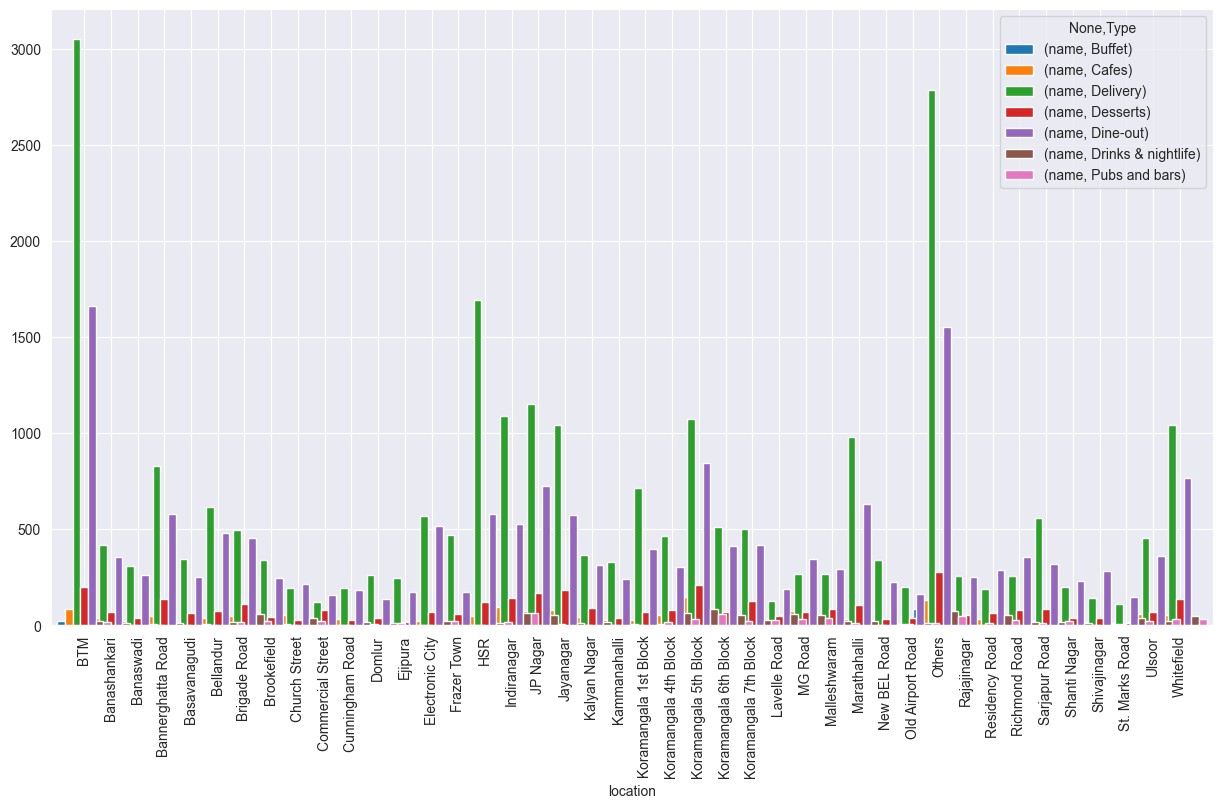

In [40]:
df3.plot(kind = 'bar',figsize= (15,8) , width = 2)

In [41]:
df4 = df[['location','votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'Others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

<Figure size 1500x800 with 0 Axes>

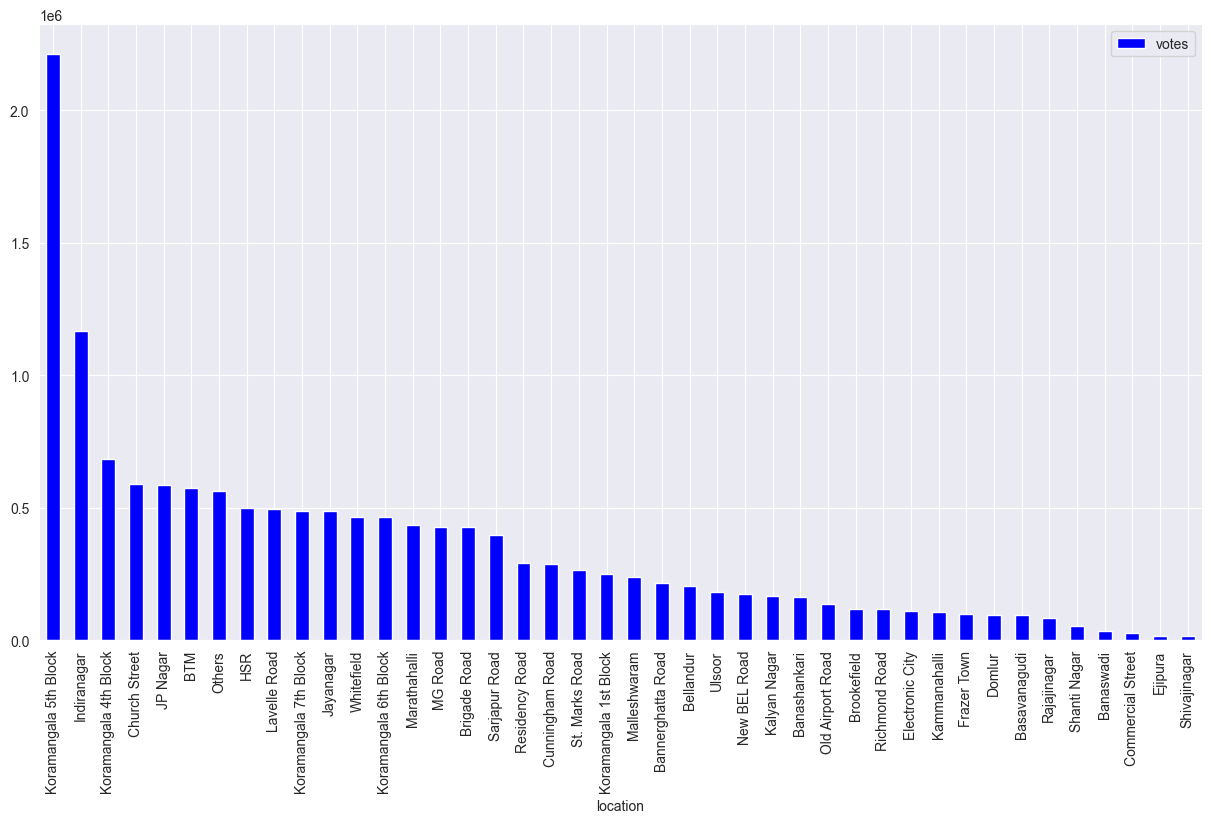

In [42]:
plt.figure(figsize=(15,8))
df5.plot(kind = 'bar',figsize= (15,8) ,color = 'blue' )
plt.xticks(rotation = 90)

In [43]:
df6 = df[['cuisines','votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
Others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [44]:
df7 = df7.iloc[1:, :]
df7.head

<bound method NDFrame.head of                                       votes
cuisines                                   
North Indian                         516310
North Indian, Chinese                258225
South Indian                         161975
North Indian, Mughlai                103706
Chinese                              101728
...                                     ...
Biryani, South Indian                  6473
Kerala, South Indian                   6083
Fast Food, Beverages                   5968
South Indian, Chinese, North Indian    2903
Mithai                                 2212

[69 rows x 1 columns]>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

<Figure size 1500x800 with 0 Axes>

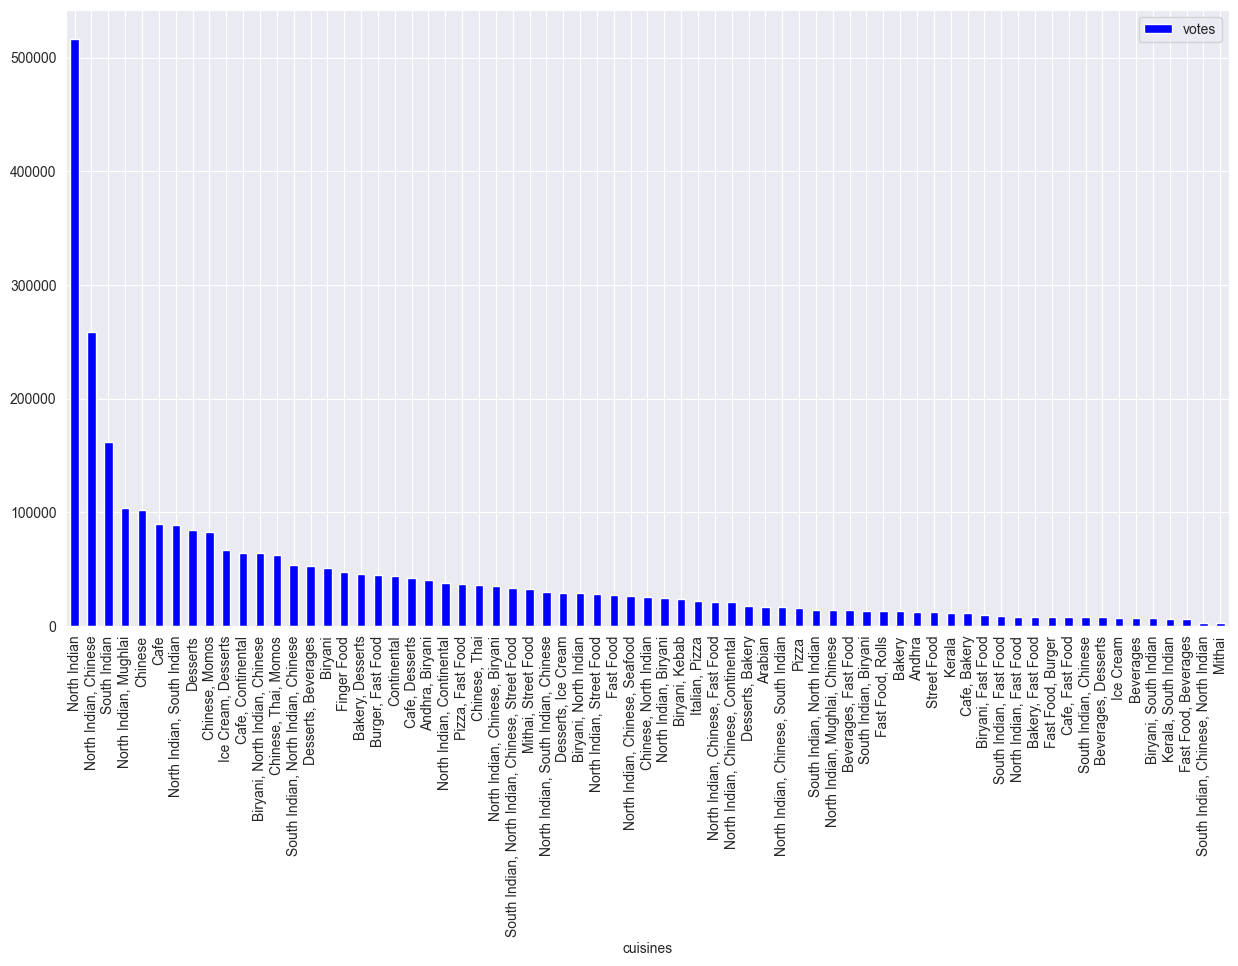

In [45]:
plt.figure(figsize=(15,8))
df7.plot(kind = 'bar',figsize= (15,8) ,color = 'blue' )
plt.xticks(rotation = 90)

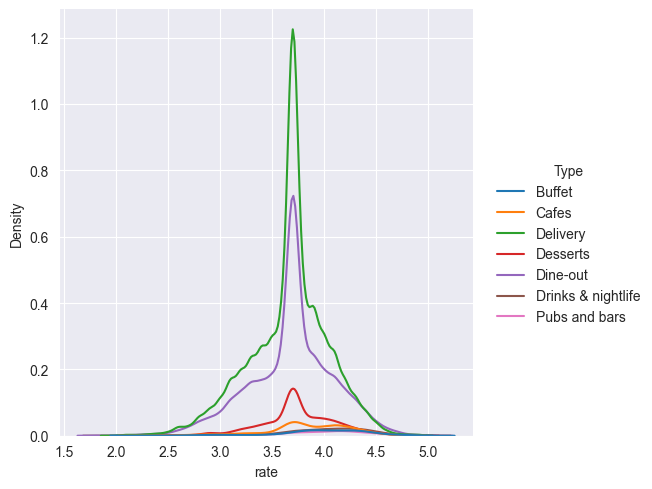

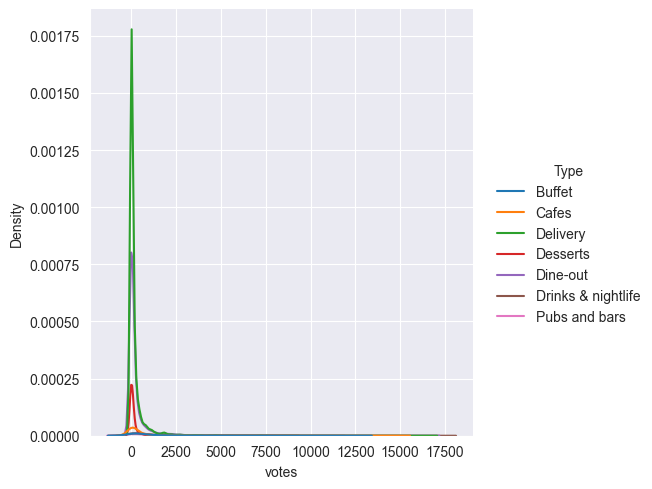

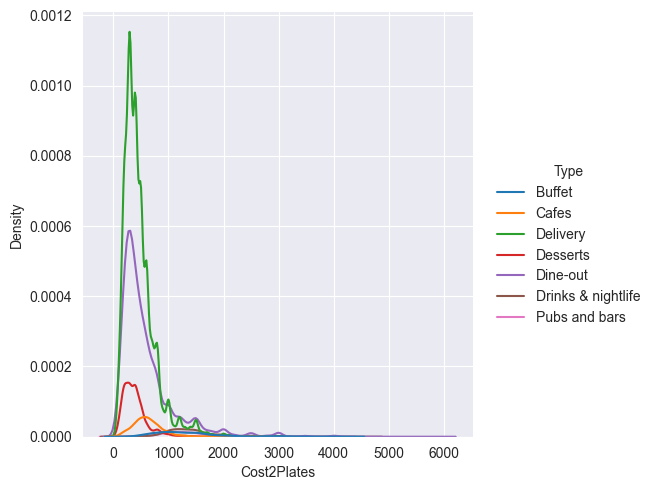

In [46]:
num_cols = df.select_dtypes(exclude=object).columns.to_list()
def create_distplots(df,x):
    sns.displot(df, x=col,hue="Type",kind="kde")
    plt.show()
    
for col in num_cols:
    create_distplots(df,col)

In [47]:
num_cols

['rate', 'votes', 'Cost2Plates']

In [48]:
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25b817e0920>,
 [Text(0.42911656458697495, 1.012846964746932, 'Quick Bites'),
  Text(-1.084063171957054, 0.18656644716135587, 'Casual Dining'),
  Text(-0.5806051799896906, -0.9342899041352952, 'Others'),
  Text(0.24511237732855842, -1.0723431924903253, 'Cafe'),
  Text(0.6299445731034387, -0.9017592998231438, 'Delivery'),
  Text(0.8658744558266604, -0.6784256972925515, 'Dessert Parlor'),
  Text(1.011867073708053, -0.4314220962647853, 'Takeaway, Delivery'),
  Text(1.076001732365232, -0.22851755282038982, 'Bakery'),
  Text(1.097340559097576, -0.07644407995011496, 'Casual Dining, Bar')],
 [Text(0.23406358068380448, 0.5524619807710537, ' 37.2 %'),
  Text(-0.5913071847038476, 0.10176351663346682, ' 20.1 %'),
  Text(-0.3166937345398312, -0.5096126749828883, ' 17.6 %'),
  Text(0.13369766036103184, -0.5849144686310864, ' 7.2 %'),
  Text(0.3436061307836938, -0.491868708994442, ' 5.0 %'),
  Text(0.4722951577236329, -0.3700503803413917, ' 4.4 %'),
  Text(0.551927494

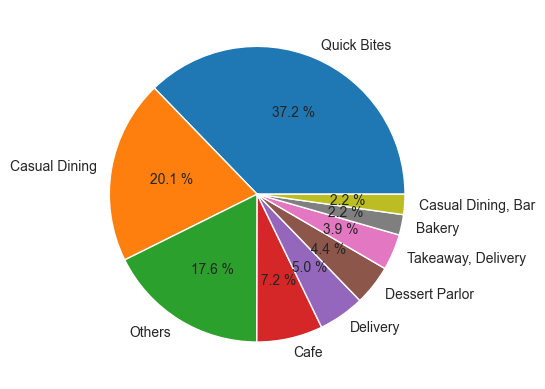

In [49]:
lbl=df['rest_type'].value_counts().index
plt.pie(df['rest_type'].value_counts(),labels=lbl,autopct ='% 1.1f %%')

In [50]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,Others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet


In [51]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2Plates     0
Type            0
dtype: int64

In [52]:
df["book_table"].replace({'No':0,'Yes':1, },inplace=True)

In [53]:
df["online_order"].replace({'No':0,'Yes':1, },inplace=True)

In [54]:
df["rest_type"].replace({'Delivery':0, 
                                   'Takeaway, Delivery':1, 
                                   'Casual Dining':2, 
                                   'Quick Bites':3,
                                   'Cafe':4, 
                                   'Bakery':5, 
                                   'Dessert Parlor':6,
                                   'Casual Dining, Bar':7,
                                   'Others':8},inplace=True)

In [55]:
df["cuisines"].replace({'North Indian, Mughlai, Chinese':0, 
                                   'Others':1, 
                                   'South Indian, North Indian':2, 
                                   'North Indian':3,
                                   'Cafe':4, 
                                   'Cafe, Continental':5, 
                                   'Cafe, Fast Food':6,
                                   'Cafe, Bakery':7,
                                   'Bakery, Desserts':8,
                                   'Pizza':9},inplace=True)
df['cuisines'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Biryani',
       'North Indian, Chinese, Fast Food', 'Chinese, Thai, Momos',
       'South Indian', 'Burger, Fast Food', 'Pizza, Fast Food',
       'North Indian, Chinese', 'Chinese, Thai', 'Ice Cream, Desserts',
       'Biryani, Fast Food', 'Fast Food, Burger', 'Desserts, Beverages',
       'Chinese', 'Bakery', 'Biryani, South Indian', 'Fast Food',
       'South Indian, Chinese, North Indian', 'Mithai, Street Food',
       'South Indian, Chinese', 'Biryani, North Indian, Chinese',
       'Desserts', 'Ice Cream', 'South Indian, North Indian, Chinese',
       'South Indian, Biryani', 'Beverages', 'Mithai',
       'North Indian, Street Food', 'Chinese, North Indian',
       'South Indian, North Indian, Chinese, Street Food', 'Andhra',
       'Italian, Pizza', 'Street Food', 'Arabian',
       'North Indian, Chinese, Continental', 'Desserts, Ice Cream',
       'North Indian, Chinese, Biryani', 'Fast Food, Rolls',
       'Beverages, Fast Food', 'North I

In [56]:
df["Type"].replace({'Buffet': 0,
                         'Cafes': 1,
                         'Delivery': 2,
                         'Desserts': 3,
                         'Dine-out': 4,
                         'Drinks & nightlife': 5,
                         'Pubs and bars': 6}, inplace=True)
df.Type.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [57]:
df.drop(["name","location"],axis=1,inplace=True)

In [58]:
df.drop(['cuisines'],axis=1,inplace=True)


In [59]:
X = df.drop("rate",axis=1)
y = df["rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['Cost2Plates'].describe()

count    40833.000000
mean       554.958391
std        439.596824
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: Cost2Plates, dtype: float64

In [60]:
X_train

,online_order,book_table,votes,rest_type,Cost2Plates,Type
33808,1,0,364,4,500.0,4
47323,0,0,8,4,500.0,1
35772,1,0,142,2,750.0,2
39245,0,0,14,8,1500.0,4
8958,1,0,0,2,600.0,2
...,...,...,...,...,...,...
11396,0,0,0,3,200.0,4
45285,0,0,0,3,150.0,2
38621,0,0,1597,7,1500.0,4
864,1,1,1964,2,1000.0,0


In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)  
y_predict = reg.predict(X_test)

from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_predict)
print(f"R-squared: {accuracy}")

R-squared: 0.274740250244103


In [62]:
dt =DecisionTreeRegressor()

In [63]:
dt.fit(X_train,y_train)  
y_predict = dt.predict(X_test)

accuracy1 = r2_score(y_test, y_predict)
print(f"R-squared: {accuracy1}")

R-squared: 0.7029654266611894


In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [65]:
rf.fit(X_train,y_train)  
y_predict = rf.predict(X_test)

accuracy2 = r2_score(y_test, y_predict)
print(f"R-squared: {accuracy2}")

R-squared: 0.7745143023436034


In [66]:
from sklearn.linear_model import Ridge, Lasso

In [67]:
ls =Lasso()
ls.fit(X_train,y_train) 
y_predict = ls.predict(X_test)

accuracy3 = r2_score(y_test, y_predict)
print(f"R-squared: {accuracy3}")

R-squared: 0.2319123455108304


In [68]:
ri = Ridge()
ri.fit(X_train,y_train)  
y_predict = ri.predict(X_test)

accuracy4 = r2_score(y_test, y_predict)
print(f"R-squared: {accuracy4}")

R-squared: 0.2747398684687019


C:\Users\Pushp Jain\AppData\Local\Temp\ipykernel_8956\1348291908.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=df,palette='inferno',width=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


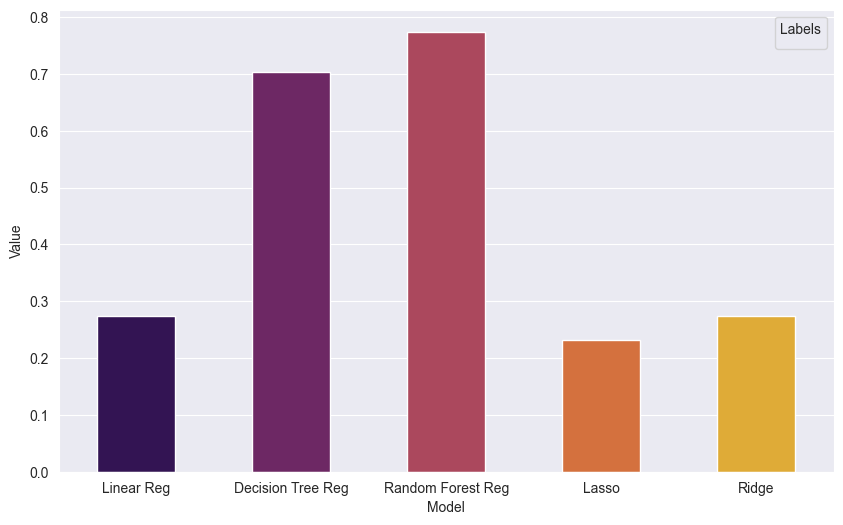

In [69]:
data = {'Model': ['Linear Reg', 'Decision Tree Reg', 'Random Forest Reg','Lasso','Ridge'],
        'Value': [accuracy, accuracy1, accuracy2,accuracy3,accuracy4],}

df = pd.DataFrame(data)

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Value', data=df,palette='inferno',width=0.5)
plt.legend(title='Labels')

plt.show()
